In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#import random
#from scipy.stats import norm
#from scipy.stats import rayleigh
#from scipy.stats import uniform

import scipy.stats as sts

from statsmodels.stats.weightstats import _zconfint_generic

# ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

Сгенерируйте примеры из распределения

In [2]:
samples_norm = sts.norm(0,1).rvs(1000)
samples_norm

array([-4.09795325e-02,  5.43761141e-01, -1.62848931e-01,  2.18013120e+00,
        6.59018583e-01,  3.59892442e-02, -5.05998769e-02,  8.39695364e-01,
       -1.28385216e-02,  9.94768832e-01, -7.86702877e-01,  6.63616498e-01,
       -6.45580222e-01,  1.25269032e+00, -1.20911051e-03, -1.17313791e+00,
       -9.90275431e-01,  5.44432720e-01, -2.47382102e-01, -7.79782579e-01,
        6.20438786e-01,  1.40008840e+00,  9.69314156e-01, -1.81100663e+00,
        5.74561516e-01,  7.85386197e-01, -5.63534296e-01, -2.12392480e+00,
       -9.54516081e-01,  1.69185361e-01,  5.94654852e-01, -1.32023328e+00,
        2.89931991e-01, -1.06732795e+00, -1.09465116e+00, -1.33605918e+00,
       -4.01276055e-02, -7.73273932e-01,  6.16511388e-01,  1.00340337e+00,
        2.02988236e+00, -2.18927059e-01, -1.17668120e+00, -8.60321808e-01,
        7.35904604e-01,  8.74128129e-01, -5.14306085e-01,  5.21998734e-02,
       -2.38093448e-02,  3.28721634e-01,  5.28402822e-01,  6.98520640e-01,
        1.38506602e+00, -

In [14]:
samples_norm_mean = samples_norm.mean() # настоящее среднее случайной величины
samples_norm_std = samples_norm.std() # cтандартное отклонение
samples_norm_var = samples_norm.var()# настоящая дисперсия случайной величины
print(samples_norm_mean, samples_norm_std, samples_norm_var)

0.0182174565555877 0.9813367378946323 0.9630217931416782


### Постройте гистограмму выборки и теоретическую плотность распределения

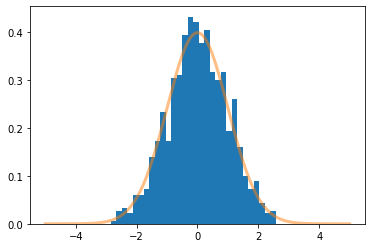

In [15]:
plt.hist(samples_norm, bins=30, density=True)
x = np.linspace(-5,5,1000)
pdf = sts.norm.pdf(x)
plt.plot(x, pdf, lw=3, label='теоретическая плотность', alpha=0.5)

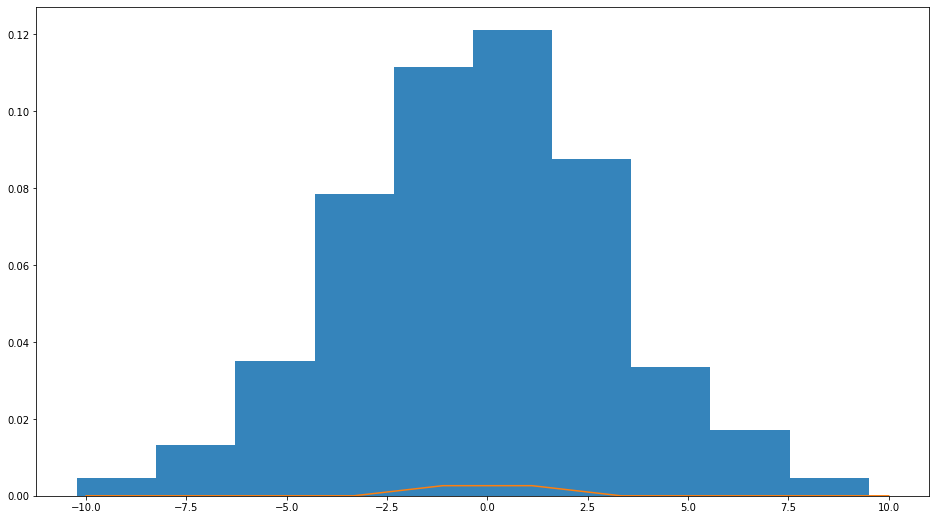

In [16]:
plt.figure(figsize=(16,9))
means_lst = []
norm_rv = sts.norm(0,10)
for i in range(1000):
    means_lst.append(np.mean(norm_rv.rvs(10)))
    
plt.hist(means_lst, alpha=0.9, density = True)

x = np.linspace(-10,10,10)
plt.plot(x, sts.norm(loc=sts.norm.mean(), scale=sts.norm.std()/np.sqrt(10)).pdf(x))

# Оценим распределение выборочного среднего для разных объёмов выборок

Для этого постройте на одном полотне гистограмму выборочных средних(mu) и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

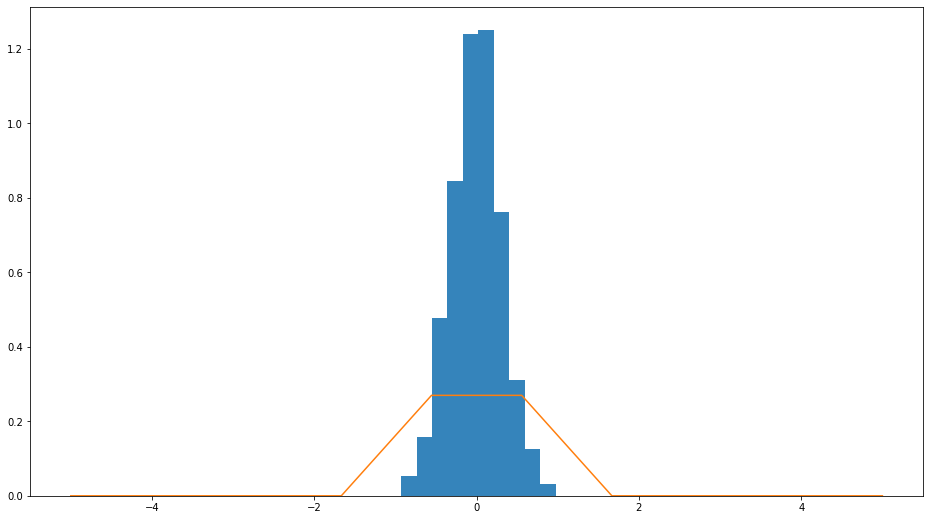

In [17]:
plt.figure(figsize=(16,9))
means_lst = []
norm_rv = sts.norm(0,1)
for i in range(1000):
    means_lst.append(np.mean(norm_rv.rvs(10)))
    
plt.hist(means_lst, alpha=0.9, density = True)

x = np.linspace(-5,5,10)
plt.plot(x, sts.norm(loc=sts.norm.mean(), scale=sts.norm.std()/np.sqrt(10)).pdf(x))

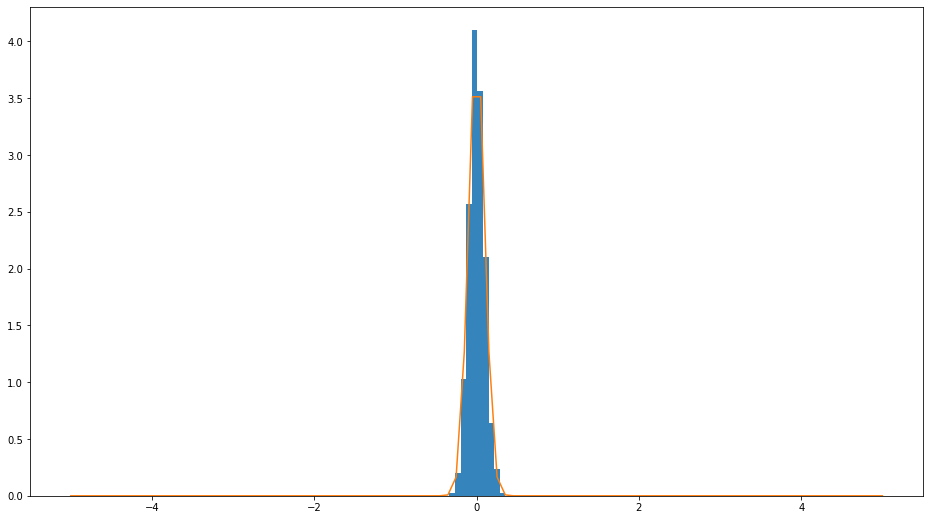

In [7]:
plt.figure(figsize=(16,9))
means_lst = []
norm_rv = sts.norm(0,1)
for i in range(1000):
    means_lst.append(np.mean(norm_rv.rvs(100)))
    
plt.hist(means_lst, alpha=0.9, density = True)

x = np.linspace(-5,5,100)
plt.plot(x, sts.norm(loc=sts.norm.mean(), scale=sts.norm.std()/np.sqrt(100)).pdf(x))

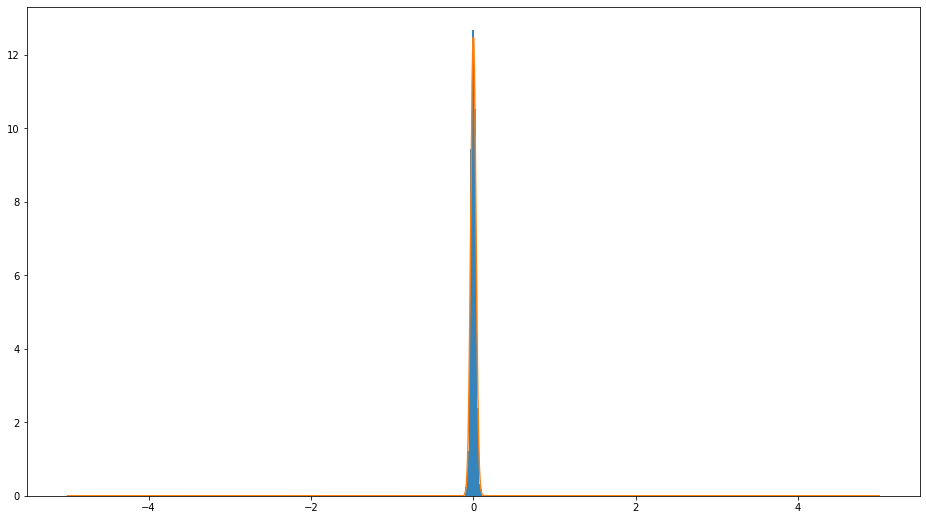

In [18]:
plt.figure(figsize=(16,9))
means_lst = []
norm_rv = sts.norm(0,1)
for i in range(1000):
    means_lst.append(np.mean(norm_rv.rvs(1000)))
    
plt.hist(means_lst, alpha=0.9, density = True)

x = np.linspace(-5,5,1000)
plt.plot(x, sts.norm(loc=sts.norm.mean(), scale=sts.norm.std()/np.sqrt(1000)).pdf(x))

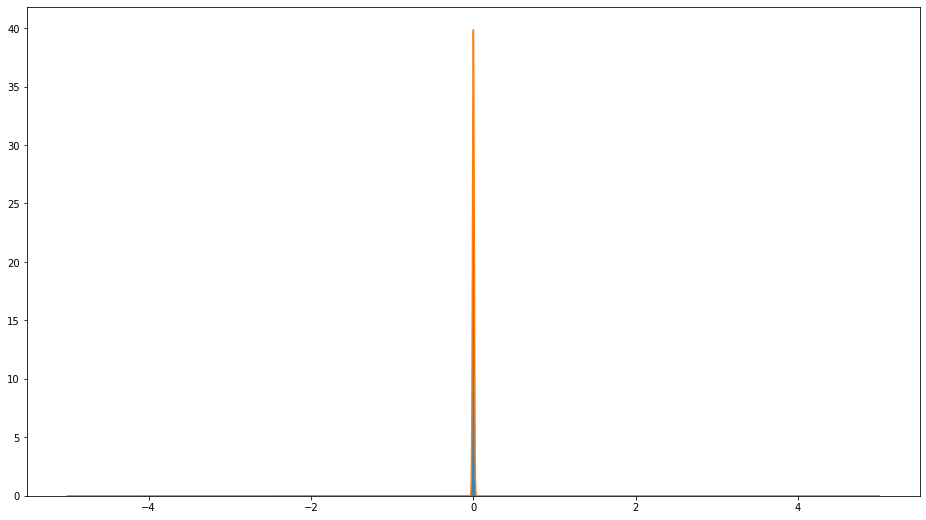

In [9]:
plt.figure(figsize=(16,9))
means_lst = []
norm_rv = sts.norm(0,1)
for i in range(1000):
    means_lst.append(np.mean(norm_rv.rvs(10000)))
    
plt.hist(means_lst, alpha=0.9, density = True)

x = np.linspace(-5,5,10000)
plt.plot(x, sts.norm(loc=sts.norm.mean(), scale=sts.norm.std()/np.sqrt(10000)).pdf(x))

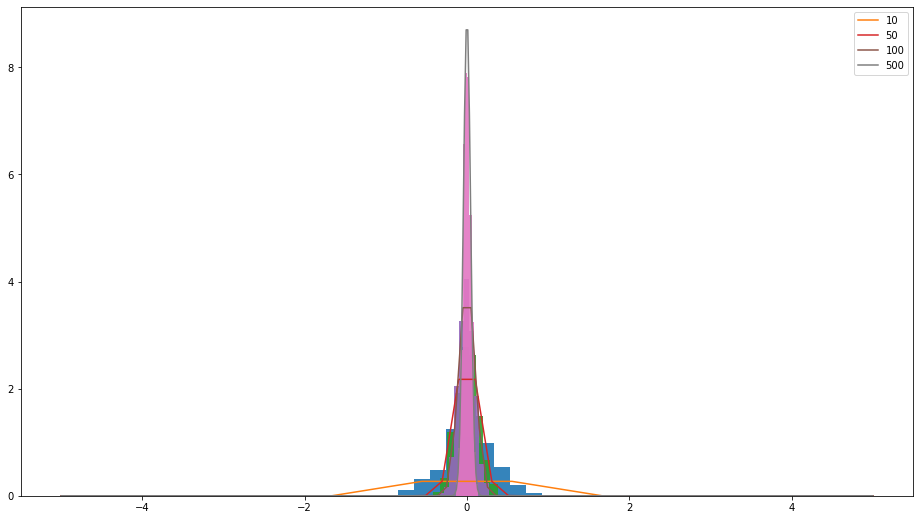

In [19]:
plt.figure(figsize=(16,9))

norm_rv = sts.norm(0,1)
volumes = [10, 50, 100, 500]

for volume in volumes:
    means_lst = []
    for i in range(1000):
        means_lst.append(np.mean(norm_rv.rvs(volume)))
    
    plt.hist(means_lst, alpha=0.9, density = True)

    x = np.linspace(-5,5,volume)
    
    plt.plot(x, sts.norm(loc=sts.norm.mean(), scale=sts.norm.std()/np.sqrt(volume)).pdf(x))

plt.legend(['10', '50', '100', '500'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

**Ответ**
Для данных графиков, для данных выборок, видно, что все графики
повторили гистограммы случайных величин. Конкретно в данных случаях 
апроксимация сработала хорошо.

# Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [24]:
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [27]:
#churn = ушел

TDC_churn_true = df[df['churn'] == True]['total day calls']

#CI_form_low = np.mean(TDC_churn_true) - 1.95 * np.std(TDC_churn_true, ddof=1) / np.sqrt(TDC_churn_true.shape[0]-1) 
#CI_form_up = np.mean(TDC_churn_true) + 1.95 * np.std(TDC_churn_true, ddof=1) / np.sqrt(TDC_churn_true.shape[0]-1) 

CI_sts_func_true = sts.norm.interval(
    alpha=0.95, 
    loc=np.mean(TDC_churn_true), 
    scale=np.std(TDC_churn_true, ddof=1)/np.sqrt(len(TDC_churn_true)))

CI_zconfint_true =_zconfint_generic(np.mean(TDC_churn_true),
    np.std(TDC_churn_true, ddof=1), 
    alpha=0.95, 
    alternative='two-sided')

#print(CI_form_low,CI_form_up)
print('Доверительный интервал ', CI_sts_func_true)
print('Доверительный интервал по функции _zconfint_generic =', CI_zconfint_true)

Доверительный интервал  (99.41066229112079, 103.26014516229537)
Доверительный интервал по функции _zconfint_generic = (99.98204678079553, 102.68876067262063)


In [26]:
#churn = не ушел

TDC_churn_false = df[df['churn'] == False]['total day calls']

#CI_form_low = np.mean(TDC_churn_true) - 1.95 * np.std(TDC_churn_true, ddof=1) / np.sqrt(TDC_churn_true.shape[0]-1) 
#CI_form_up = np.mean(TDC_churn_true) + 1.95 * np.std(TDC_churn_true, ddof=1) / np.sqrt(TDC_churn_true.shape[0]-1)

CI_sts_func_false = sts.norm.interval(
    alpha=0.95, 
    loc=np.mean(TDC_churn_false), 
    scale=np.std(TDC_churn_false, ddof=1)/np.sqrt(len(TDC_churn_false)))

CI_zconfint_false = _zconfint_generic(np.mean(TDC_churn_false),
    np.std(TDC_churn_false, ddof=1), 
    alpha=0.95, 
    alternative='two-sided')

#print(CI_form_low,CI_form_up)
print('Доверительный интервал ', CI_sts_func_false)
print('Доверительный интервал по функции _zconfint_generic =', CI_zconfint_false)

Доверительный интервал  (99.55618833318324, 101.01012745629045)
Доверительный интервал по функции _zconfint_generic = (99.04149114274125, 101.52482464673244)
